# Proyecto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import macti.vis

# Biblioteca que contiene funcionalidades para este proyecto
# Cálculo de la media, varianza, covarianza, regresión lineal,
# graficación de boxplots, histogramas, datos dispersos.
from f_estadisticas import *

## Revisando los datos de Anscombe

In [2]:
# Lectura de datos del archivo
datos = pd.read_csv("AnscombeQuartet.csv")

# Transformación a arreglos de numpy
x1 = np.array(datos.x1)
y1 = np.array(datos.y1)
x2 = np.array(datos.x2)
y2 = np.array(datos.y2)
x3 = np.array(datos.x3)
y3 = np.array(datos.y3)
x4 = np.array(datos.x4)
y4 = np.array(datos.y4)

print(f"x1 = {x1}")
print(f"y1 = {y1}")
print(f"x2 = {x2}")
print(f"y2 = {y2}")
print(f"x3 = {x3}")
print(f"y3 = {y3}")
print(f"x4 = {x4}")
print(f"y4 = {y4}")

x1 = [10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
y1 = [ 8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68]
x2 = [10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
y2 = [9.14 8.14 8.74 8.77 9.26 8.1  6.13 3.1  9.13 7.26 4.74]
x3 = [10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
y3 = [ 7.46  6.77 12.74  7.11  7.81  8.84  6.08  5.39  8.15  6.42  5.73]
x4 = [ 8.  8.  8.  8.  8.  8.  8. 19.  8.  8.  8.]
y4 = [ 6.58  5.76  7.71  8.84  8.47  7.04  5.25 12.5   5.56  7.91  6.89]


### Análsis exploratorio

**Valores atípicos**.

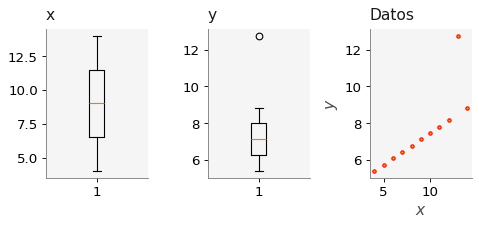

In [3]:
# Veamos el conjunto 3 de los datos de Anscombe
plot_boxplots(x3, y3)

Observamos datos atípicos en $y$.

Hagamos la regresión lineal como sigue:

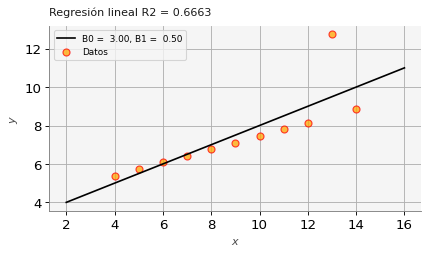

In [4]:
B0, B1, R2, xr, yr = reglin(x3, y3)

Podemos eliminar los valores atípicos usando el [rango intercuartílico](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico) definido como $IQR = Q3 - Q1$, $Q1$ y $Q3$ representan el primer y el tercer cuartil. Generalmente los valores que están $1.5$ veces el rango intercuartílico por encima o por debajo de $Q3$ y $Q1$, se consideran atípicos:

**Algoritmo.**
* Calcular: límite inferior = Q1 - 1.5 * IQR. 
* Calcular: límite superior = Q3 + 1.5 * IQR. 
* Cualquier valor que sea menor que el límite inferior o mayor que el límite superior se considera un valor atípico.

La función `elimina_ouliers()` utiliza este algoritmo para eliminar valores atípicos y se usa en la siguiente celda.

In [5]:
x_no, y_no = elimina_outliers(x3, y3, silent=False)

Lim. inferior = 3.6549999999999994
Lim. superior = 10.575000000000001


El resultado es almacenado en los arreglos `x_no` y `y_no`. Revisemos el resultado en los boxplots:

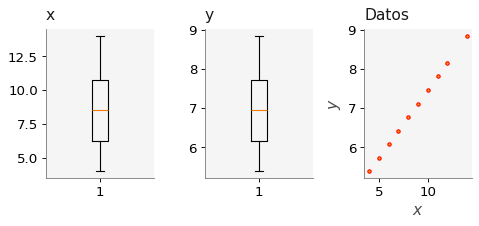

In [6]:
plot_boxplots(x_no, y_no)

Observa que ya no hay valores atípicos. Realizamos la regresión lineal nuevamente:

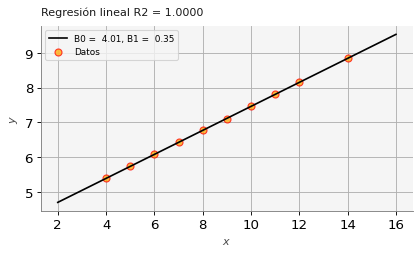

In [7]:
B0, B1, R2, xr, yr = reglin(x_no, y_no)

Observa que sin el valor atípico el resultado es *perfecto* ($R^2 = 1.0$).

## Datos: Encuesta Nacional de Salud y Nutrición.

<div class="alert alert-info">

Usaremos un conjunto de datos que proviene de la [Encuesta Nacional de Salud y Nutrición (ENSANUT)](https://ensanut.insp.mx/encuestas/ensanutcontinua2022/descargas.php) y fue integrado y publicado en [Kaggle](https://www.kaggle.com/datasets/frederickfelix/hipertensin-arterial-mxico). Incluye variables biométricas, clínicas y de estilo de vida relevantes para el estudio de enfermedades crónicas como la hipertensión arterial.

- **Variables clave**: Se incluyen indicadores como edad, sexo, actividad física total, hemoglobina glucosilada, glucosa promedio, colesterol LDL y HDL, triglicéridos, masa corporal, medida de cintura, presión arterial y riesgo de hipertensión.

Los datos se encuentran en el archivo `datos.csv`.

</div>

In [9]:
# Lectura de datos
df = pd.read_csv("datos.csv")

In [10]:
# Mostrar los primeros renglones de información.
df.head()

,edad,sexo,actividad_total,valor_hemoglobina_glucosilada,resultado_glucosa_promedio,valor_colesterol_ldl,valor_colesterol_hdl,valor_trigliceridos,masa_corporal,medida_cintura,riesgo_hipertension,tension_arterial
0,41,2,120,5.2,103,86.0,34,123,32.889389,0.0,1,107
1,65,2,240,6.2,131,130.0,73,131,1.000000,0.0,0,104
2,68,2,480,5.2,103,86.0,34,123,1.000000,0.0,0,105
3,35,1,275,5.3,105,107.0,49,297,26.265339,98.5,1,117
4,65,2,255,7.0,154,76.0,41,136,1.000000,0.0,0,123


In [11]:
# Mostrar los nombres de las columnas de los datos
df.columns

Index(['edad', 'sexo', 'actividad_total', 'valor_hemoglobina_glucosilada',
       'resultado_glucosa_promedio', 'valor_colesterol_ldl',
       'valor_colesterol_hdl', 'valor_trigliceridos', 'masa_corporal',
       'medida_cintura', 'riesgo_hipertension', 'tension_arterial'],
      dtype='object')

In [12]:
# Seleccionamos dos variables y las convertimos en arreglos de numpy
x = np.array(df.masa_corporal)
y = np.array(df.resultado_glucosa_promedio)

### Análisis exploratorio.

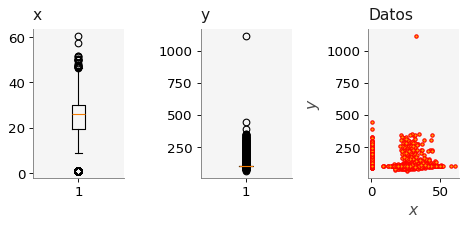

In [13]:
plot_boxplots(x, y)

### Regresión lineal con todos los datos.

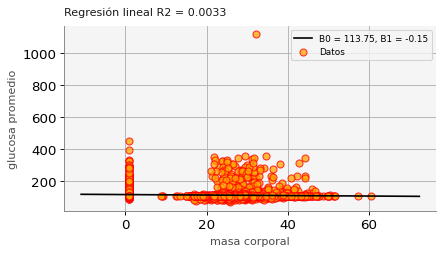

In [14]:
B0, B1, R2, xr, yr = reglin(x, y, xlabel = "masa corporal", ylabel = "glucosa promedio")

**¿Qué puedes decir de estos resultados?**

### Eliminamos valores atípicos.

In [15]:
x_no, y_no = elimina_outliers(x, y, q3=0.85, silent=False) # Ojo con el parámetro q3

Lim. inferior = 91.0
Lim. superior = 123.0


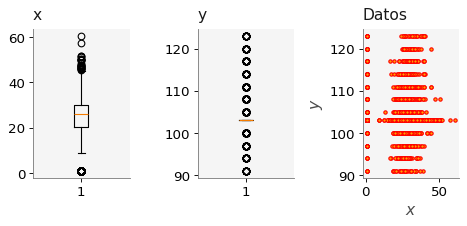

In [16]:
# Boxplots sin valores atípicos. ¿Qué opinas del resultado?
plot_boxplots(x_no, y_no)

### Regresión lineal sin valores atípicos.

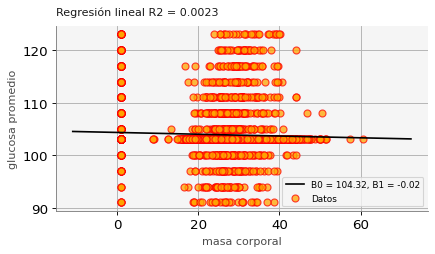

In [17]:
B0, B1, R2, xr, yr = reglin(x_no, y_no, xlabel = "masa corporal", ylabel = "glucosa promedio")

**¿Qué opinas de este resultado?** 

Dibujemos un histograma de los datos de masa corporal.

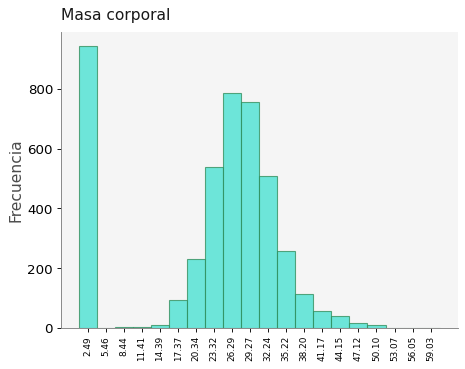

In [18]:
histograma(x, title = "Masa corporal")

La función `elimina_outliers_manual()` elimina valores definiendo un valor mínimo (`vmin`) y un valor máximo (`vmax`) en los datos. Veamos la siguiente celda:

In [21]:
y_no, x_no = elimina_outliers_manual(y, x, vmin=10, vmax=60, silent = False)

Lim. inferior = 10
Lim. superior = 60


Dibujemos el histograma de los datos de $x$ sin valroes atípicos almacenados en `x_no` 

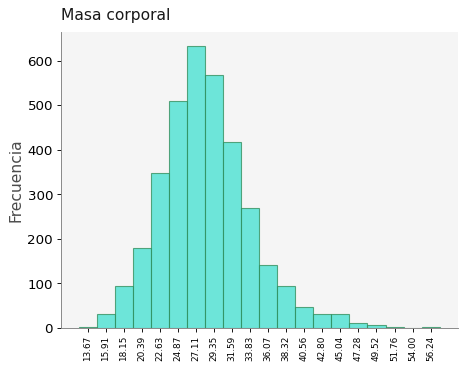

In [24]:
histograma(x_no, title = "Masa corporal")

**¿Te parece que los datos están mejor ahora?**

Veamos los boxplots con estos datos.

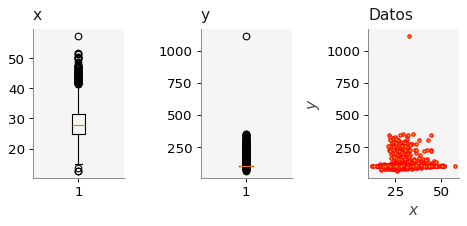

In [23]:
plot_boxplots(x_no, y_no)

Y qué pasa con la regresión lineal usando estos nuevos datos:

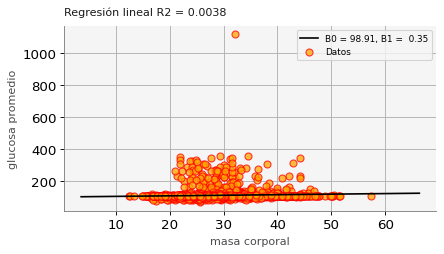

In [26]:
B0, B1, R2, xr, yr = reglin(x_no, y_no, xlabel = "masa corporal", ylabel = "glucosa promedio")

**¿Qué opinas de este resultado?**

Eliminemos otros datos, revisemos los boxplots y hagamos la regresión lineal.

In [27]:
x_no, y_no = elimina_outliers_manual(x_no, y_no, vmin=10, vmax=500, silent=False)

Lim. inferior = 10
Lim. superior = 500


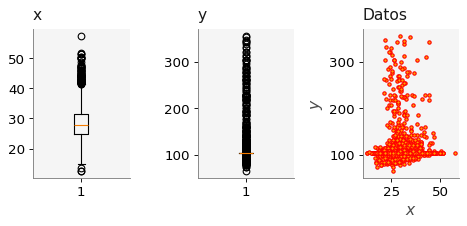

In [28]:
plot_boxplots(x_no, y_no)

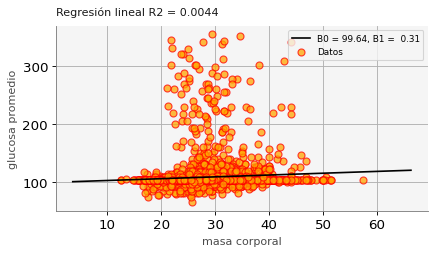

In [29]:
B0, B1, R2, xr, yr = reglin(x_no, y_no, xlabel = "masa corporal", ylabel = "glucosa promedio")

¿No es suficiente?.

Eliminemos más datos y repitamos el proceso.

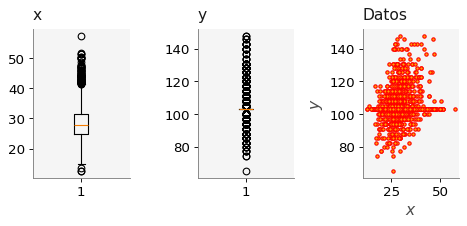

In [32]:
plot_boxplots(x_no, y_no)

In [30]:
x_no, y_no = elimina_outliers_manual(x_no, y_no, vmin=10, vmax=150, silent=False)

Lim. inferior = 10
Lim. superior = 150


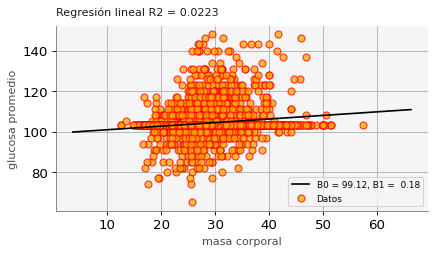

In [31]:
B0, B1, R2, xr, yr = reglin(x_no, y_no, xlabel = "masa corporal", ylabel = "glucosa promedio")

**¿Es este un buen resultado?**

## Objetivos.

* Realiza un análisis exploratorio de los datos de la ENSANUT.
* Elije dos variables que te parezcan interesantes.
* Explica por que elegiste esas variables.
* Elimina valores atípicos si lo consideras necesario.
    * Explica por qué decidiste eliminar valores atípicos.
* Realiza una juste mediante una regresión lineal simple.
* Explica tus resultados. 